In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats
import seaborn as sns

# Data loading

In [3]:
openFood_filtred = pd.read_csv('openFoodV2.csv')

In [4]:
openFood_filtred.shape

(537827, 9)

In [5]:
openFood_filtred.isna().mean().to_frame()

,0
product_name,0.0
origins,0.0
nutriscore_grade,0.0
additives_n,0.0
trans-fat_100g,0.0
sugars_100g,0.0
ingredients_from_palm_oil_n,0.0
salt_100g,0.0
nutrition-score-fr_100g,0.0


In [6]:
openFood_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537827 entries, 0 to 537826
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   product_name                 537827 non-null  object 
 1   origins                      537827 non-null  object 
 2   nutriscore_grade             537827 non-null  object 
 3   additives_n                  537827 non-null  float64
 4   trans-fat_100g               537827 non-null  float64
 5   sugars_100g                  537827 non-null  float64
 6   ingredients_from_palm_oil_n  537827 non-null  float64
 7   salt_100g                    537827 non-null  float64
 8   nutrition-score-fr_100g      537827 non-null  float64
dtypes: float64(6), object(3)
memory usage: 36.9+ MB


# Mode calculation for all variables

Mode calculation for 'sugars_100g'

In [7]:
openFood_filtred['sugars_100g'].mode()

0    3.8
Name: sugars_100g, dtype: float64

# Univariate Analysis - Sugar

We reduce our analysis to 20 lines to facilitate the display of graphs

Sugar bar chart

In [8]:
openFood_filtred2 = openFood_filtred.head(20)

In [9]:
#openFood_filtred2.plot.bar(y='sugars_100g')

In [10]:
openFood_filtred['sugars_100g'].describe()

count    537827.000000
mean          2.995413
std           2.051078
min           0.000000
25%           1.000000
50%           3.800000
75%           3.800000
max           9.380000
Name: sugars_100g, dtype: float64

Distribution of sugar

<AxesSubplot:title={'center':'Distribution de sugars'}, xlabel='sugars_100g', ylabel='Count'>

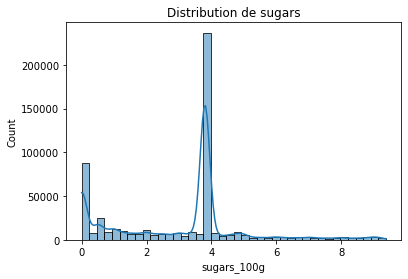

In [11]:
plt.title('Distribution de sugars')
sns.histplot(data=openFood_filtred, x="sugars_100g", bins=40, kde=True)
#plt.savefig('distrib_sugars.png')

Sugar Box plot

Text(0.5, 1.0, 'Boxplot sucre')

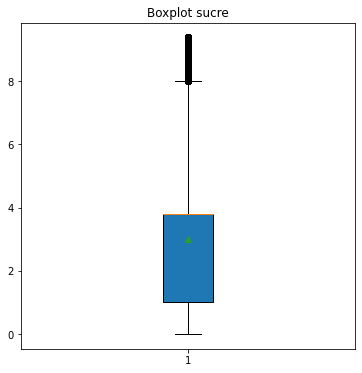

In [12]:
plt.figure(figsize = (6,6))
sucre = openFood_filtred['sugars_100g']
plt.boxplot(sucre, patch_artist = True, showmeans=True)
#plt.ylim(-3,60)
plt.title('Boxplot sucre')
#plt.savefig('boxplot_sugars.png')

Product containing no sugars

In [13]:
openFood_filtred[openFood_filtred['sugars_100g'] == 0].shape

(76119, 9)

Number of row and column

In [14]:
openFood_filtred.shape

(537827, 9)

# Univariate salt analysis

In [15]:
openFood_filtred['salt_100g'].describe()

count    537827.000000
mean          0.417636
std           0.269657
min           0.000000
25%           0.100000
50%           0.572500
75%           0.572500
max           0.930000
Name: salt_100g, dtype: float64

Distribution of salt

<AxesSubplot:title={'center':'Distribution du salt'}, xlabel='salt_100g', ylabel='Count'>

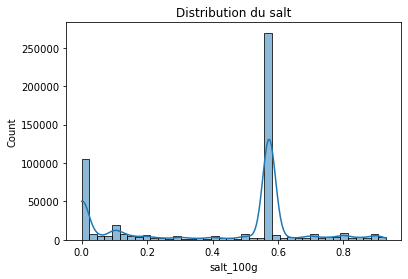

In [17]:
plt.title('Distribution of salt')
sns.histplot(data=openFood_filtred, x="salt_100g", bins=40, kde=True)

Salt Box Plot

Text(0.5, 1.0, 'Boxplot sel')

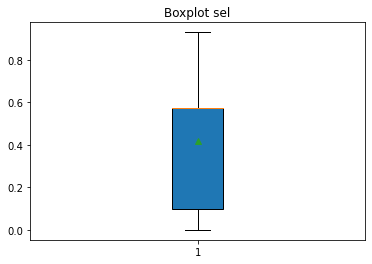

In [18]:
plt.boxplot(openFood_filtred['salt_100g'], patch_artist = True, showmeans=True)
plt.title('Boxplot sel')
#plt.savefig('boxplot_salt.png')

## Univariate nutriscore_grade analysis

In [19]:
openFood_filtred_barplot = openFood_filtred['nutriscore_grade'].value_counts().to_frame()

In [20]:
openFood_filtred.columns

Index(['product_name', 'origins', 'nutriscore_grade', 'additives_n',
       'trans-fat_100g', 'sugars_100g', 'ingredients_from_palm_oil_n',
       'salt_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [21]:
openFood_filtred.shape

(537827, 9)

<AxesSubplot:>

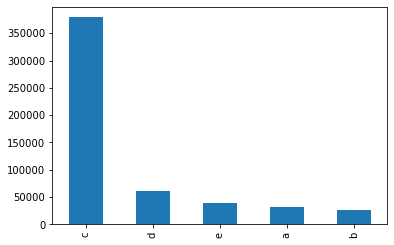

In [22]:
openFood_filtred_barplot['nutriscore_grade'].plot(kind='bar')

# Multivariate Analysis - Sugar and Salt

Scatter plot of sugar (sugars_100g) and salt (salt_100g) with outliers

Beyond 1000 lines the graph is less readable

In [23]:
openFood_filtred_mult = openFood_filtred.head(1000)

Text(0.5, 1.0, 'Nuage de point sucre et sel')

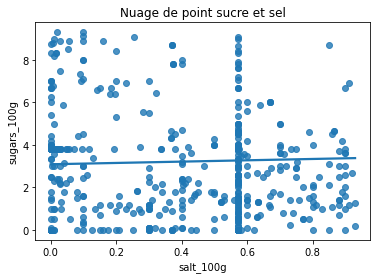

In [24]:
sucre = openFood_filtred_mult['sugars_100g']
sel = openFood_filtred_mult['salt_100g']
sns.regplot(x = sel, y = sucre, ci=None)
plt.title('Nuage de point sucre et sel')
#plt.savefig('nuage_salt_regression_Oultlier.png')

# Standardisation mise entre parenthèse

In [25]:
#La standardisation des données ne changent rien à l'affichage 
#df_std = pd.DataFrame(X_std.tolist())
#X_data = openFood_filtred[['sugars_100g','salt_100g']]
#std_scale = preprocessing.StandardScaler().fit(X_data)
#X_std = std_scale.transform(X_data)

# Multivariate Analysis

### Multivariate Analysis - Sugar (sugars_100g) and Nutri score (nutriscore_grade) without outlier

Scatter plot sugar and nutri score without outlier

Text(0.5, 1.0, 'Nuage de point nutriscore FR et du sucre')

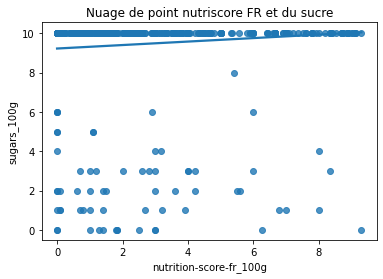

In [26]:
sucre = openFood_filtred_mult['sugars_100g']
nutrition = openFood_filtred_mult['nutrition-score-fr_100g']
sns.regplot(x = sucre, y = nutrition, ci=None)
plt.xlabel('nutrition-score-fr_100g')
plt.ylabel('sugars_100g')
plt.title('Nuage de point nutriscore FR et du sucre')
#plt.savefig('nuage_nutri_fr2.png')
#Figure 1 avec openFood_filtred2

Text(0.5, 1.0, 'Nuage de point nutriscore_grade et du sucre')

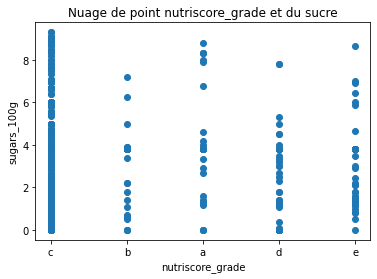

In [27]:
sucre = openFood_filtred_mult['sugars_100g']
nutriscore = openFood_filtred_mult['nutriscore_grade']
plt.scatter(nutriscore,sucre)
plt.xlabel('nutriscore_grade')
plt.ylabel('sugars_100g')
plt.title('Nuage de point nutriscore_grade et du sucre')
#plt.savefig('nuage_nutri_outlier.png')

### Multivariate Analysis - Sugars (sugars_100g) and Nutri score FR (nutrition-score-fr_100g)

Scatter plot sugars and nutri score FR 100G

Text(0.5, 1.0, 'Nuage de point nutriscore FR et du sucre')

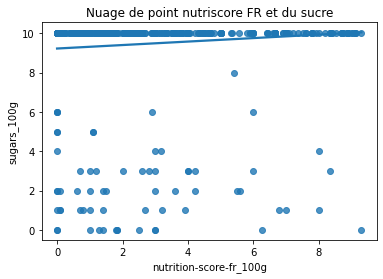

In [28]:
sucre = openFood_filtred_mult['sugars_100g']
nutrition = openFood_filtred_mult['nutrition-score-fr_100g']
sns.regplot(x = sucre, y = nutrition, ci=None)
plt.xlabel('nutrition-score-fr_100g')
plt.ylabel('sugars_100g')
plt.title('Nuage de point nutriscore FR et du sucre')
#plt.savefig('nuage_nutri_fr2.png')
#Figure 1 avec openFood_filtred2

Text(0.5, 1.0, 'Nuage de point nutriscore FR et du sucre')

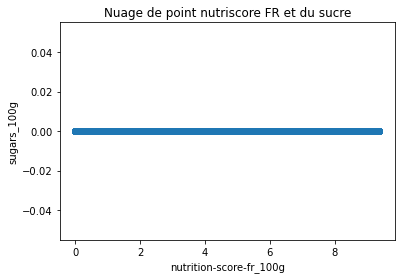

In [29]:
sucre = openFood_filtred['sugars_100g']
nutrition = openFood_filtred['trans-fat_100g']
sns.regplot(x = sucre, y = nutrition, ci=None)
plt.xlabel('nutrition-score-fr_100g')
plt.ylabel('sugars_100g')
plt.title('Nuage de point nutriscore FR et du sucre')

# Correlation studies

## Pearson - linear correlation

In [30]:
from scipy import stats

In [31]:
X = openFood_filtred_mult.drop(['sugars_100g','product_name','origins','nutriscore_grade'],axis=1)

In [32]:
Y = openFood_filtred_mult['sugars_100g']

In [33]:
for i in X.columns: 
    print("Coefficient de correlation, p-value (Sucre et "+i+"):\n"+str(stats.pearsonr(Y, X[i])[0])+"\n")
    #print("Hypothèse : La variable sucre et la variable "+i+" sont non-corrélées\nCoefficient de correlation, p-value (Sucre et "+i+"):\n"+str(stats.pearsonr(Y, X[i])[0])+"\n")

Coefficient de correlation, p-value (Sucre et additives_n):
-0.14379797729412647

Coefficient de correlation, p-value (Sucre et trans-fat_100g):
nan

Coefficient de correlation, p-value (Sucre et ingredients_from_palm_oil_n):
nan

Coefficient de correlation, p-value (Sucre et salt_100g):
0.03868882040784942

Coefficient de correlation, p-value (Sucre et nutrition-score-fr_100g):
0.08507444729690584



/Users/nax/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Les features sont peu corrélées

La variable sucre et additives_n sont corrélées négativement (anti-corrélées)

## Test Chi 2

Categorical variable - origins and nutriscore_grade

In [69]:
tab_cont = pd.crosstab(openFood_filtred['origins'], openFood_filtred['nutriscore_grade'])


In [72]:
stat_chi2, p, dof, expected_table = chi2_contingency(tab_cont.values)
format(p, '.8f')

'0.00000000'

In [73]:
# p<=alpha=0,05
# Hypothèse : il y a une correlation entre le sel et le sucre 
#Thèse
#donc je peux faire confiance à ma solution
#Rajouter Hypothèse et conclusion

#format(p, '.8f')


alpha = 0,05

p < alpha

H0 is rejected

So I can trust my solution

## ANOVA
H0 : variables sugars_100g and nutriscore_grade are independents


H1 : variables sugars_100g and nutriscore_grade are dependents

In [53]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [66]:
p = eta_squared(openFood_filtred['nutriscore_grade'],openFood_filtred['sugars_100g'])

In [67]:
#k2, p = stats.normaltest(openFood_filtred['sugars_100g'], axis=0,nan_policy = 'omit')


In [68]:
alpha = 0.05
p
format(p, '.8f')


'0.00001276'

p < alpha the null hypothesis is rejected

nutriscore_grade variable affects sugars_100g variable


## HeatMap

In [38]:
X_data = openFood_filtred[['additives_n','trans-fat_100g','sugars_100g','salt_100g','nutrition-score-fr_100g']]            

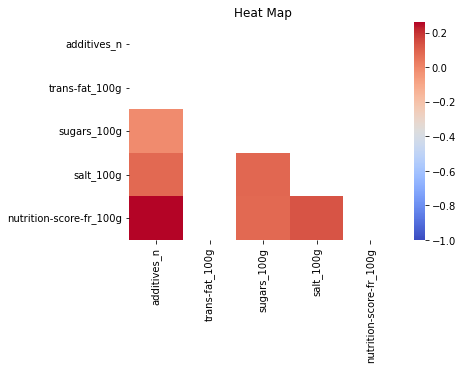

In [42]:
plt.title('Heat Map')

heat = X_data.corr()

mask = np.zeros_like(heat , dtype=bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(heat , mask=mask, vmin=-1, cmap='coolwarm')
plt.show()

## ACP

Data standardization

In [65]:
X_data.isna().mean()

additives_n                0.0
trans-fat_100g             0.0
sugars_100g                0.0
salt_100g                  0.0
nutrition-score-fr_100g    0.0
dtype: float64

In [66]:
feature = ['additives_n','trans-fat_100g','sugars_100g','salt_100g','nutrition-score-fr_100g']

Principal component calculation

In [67]:
from sklearn import decomposition,preprocessing

In [68]:
X_scaled = preprocessing.StandardScaler().fit_transform(X_data)
pca = decomposition.PCA(n_components=5)
X_projected = pca.fit_transform(X_scaled)

In [69]:
pd.DataFrame(X_projected, columns=["F"+str(i+1) for i in range(5)])

,F1,F2,F3,F4,F5
0,-0.819521,0.287892,0.119218,0.163202,-1.112016e-17
1,-0.819521,0.287892,0.119218,0.163202,1.872486e-14
2,-0.819521,0.287892,0.119218,0.163202,-2.200273e-20
3,-0.819521,0.287892,0.119218,0.163202,-2.200273e-20
4,-0.819521,0.287892,0.119218,0.163202,-2.200273e-20
...,...,...,...,...,...
537822,0.100156,-0.530283,-1.604001,0.012460,1.458153e-20
537823,-0.819521,0.287892,0.119218,0.163202,-2.200273e-20
537824,-0.565320,-0.852913,1.133000,-0.157639,-7.753353e-21
537825,-0.594101,1.230675,-2.165762,0.475223,-1.820737e-20


Link between main components and features

In [70]:
pca.components_[0]

array([-5.79821105e-01,  1.11022302e-16, -2.32434761e-01, -4.33182944e-01,
       -6.49718482e-01])

In [71]:
df_acp_sante = pd.DataFrame()

In [72]:
for u in range(5):
    df_acp_sante["F"+str(u+1)] = pca.components_[u].tolist()

In [73]:
df_acp_sante.set_axis(feature, axis='index')

,F1,F2,F3,F4,F5
additives_n,-5.798211e-01,-4.511207e-01,-1.530778e-01,0.660957,-1.717610e-17
trans-fat_100g,1.110223e-16,4.163336e-17,-9.020562e-17,0.000000,1.000000e+00
sugars_100g,-2.324348e-01,7.930429e-01,-5.195684e-01,0.217038,-3.469447e-17
salt_100g,-4.331829e-01,3.853739e-01,8.116639e-01,0.071002,5.551115e-17
nutrition-score-fr_100g,-6.497185e-01,-1.380580e-01,-2.186723e-01,-0.714834,0.000000e+00


Graphic Dial

After projection, we see a relationship between nutrition-score-fr_100g and additives_n

(-0.85, 0.85)

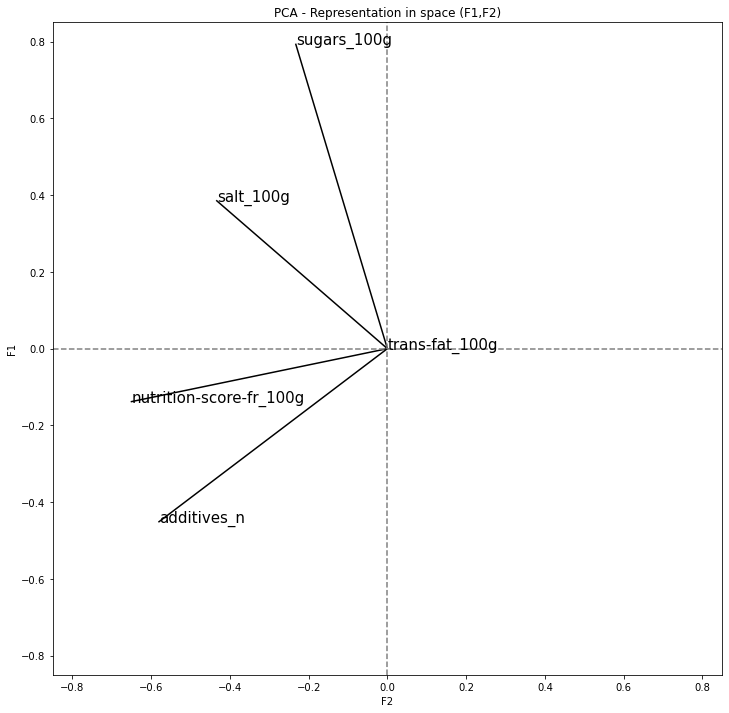

In [74]:
pcs = pca.components_
plt.figure(figsize=(12,12))
plt.xlabel('F2')
plt.ylabel('F1')
plt.title('PCA - Representation in space (F1,F2)')
for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Display a segment from origin to the point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Display the name of the feature (df_data_all.columns[i])
    plt.text(x, y, X_data.columns[i], fontsize='15')

# Display an horizontal line y=0
plt.plot([-0.85, 0.85], [0, 0], color='grey', ls='--')

# Display vertical line x=0
plt.plot([0, 0], [-0.85, 0.85], color='grey', ls='--')

#plt.xlim([-0.7, 0.7])
#plt.ylim([-0.7, 0.7])
plt.xlim([-0.85, 0.85])
plt.ylim([-0.85, 0.85])
#plt.savefig('Cadran_Pca.png')

Text(0.5, 1.0, 'Diagramme de Pareto - Ebouli')

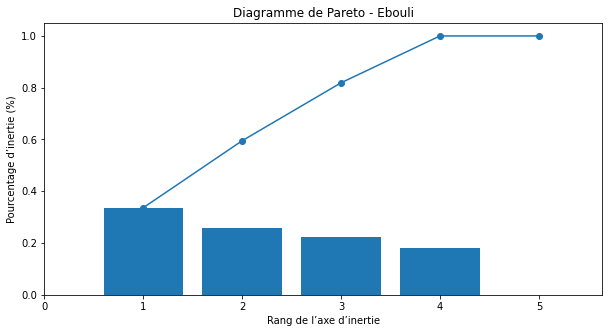

In [75]:
#Diagramme de Pareto - Ebouli
fig = plt.figure(figsize = (10, 5))
x = np.arange(1, len(X_data.columns)+1, step=1)
y = pca.explained_variance_ratio_
#Affiche le bar chart
plt.bar(np.arange(1, len(X_data.columns)+1, step=1),pca.explained_variance_ratio_)
#Affiche la courbe sommée
plt.plot(x,np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xticks(np.arange(0, len(X_data.columns)+1, step=1))
plt.ylabel('Pourcentage d’inertie (%)')
plt.xlabel('Rang de l’axe d’inertie')
plt.title('Diagramme de Pareto - Ebouli')
#plt.savefig('Ebouli.png')